# **Corona Dataset Analysis and Prediction of future using basic to advanced tools**

The coronavirus COVID-19 is affecting 215 countries and territories around the world

Corona statistics all over the world(at the time the report was written) is:


1.   Confirmed:   3,917,944
2.   Death:       270,740
3.   Recovered:   1,344,260

Corona statistics in India(at the time the report was written) is:


1.   Confirmed:   56,409
2.   Death:       1,890
3.   Recovered:   16,790

These Datasets used contain data till 03-May-2020
The Report was written on 08-May-2020

Doctors are giving thier best to the patients and research laboratories are working hard to find the vaccine

Engineers are also doing thier best by discovering new techniques to identify new cases and what steps are useful to take this pandemic to an end

Here,we will analyse the current situation of India and we will compare with few other countries,we will discuss the reasons of why the things are going in this way and we will predict the change in number of cases using Prophet(an open source facebook program)

we are going to compare:
*   India
*   Italy
*   Korea

**Importing required libraries for analysis**

In [0]:
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
from fbprophet import Prophet
import pandas as pd


# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 12, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

#**Analysing India's corona virus Cases**
**Reading a csv file using** **pandas**

In [3]:
#reading a csv file by creating a dataframe using pandas
df= pd.read_csv('/content/Covid cases in India.csv')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases,Active,Cured/Discharged/Migrated,Deaths
0,1,Andhra Pradesh,1583,1062,488,33
1,2,Andaman and Nicobar Islands,33,1,32,0
2,3,Arunachal Pradesh,1,0,1,0
3,4,Assam,43,9,33,1
4,5,Bihar,517,396,117,4
5,6,Chandigarh,97,77,19,1
6,7,Chhattisgarh,57,21,36,0
7,8,Delhi,4549,3123,1362,64
8,9,Goa,7,0,7,0
9,10,Gujarat,5428,4096,1042,290


**Reading Indian states and union territories coordinates and per day cases in few countries**



In [0]:

India_coord = pd.read_csv('/content/Indian Coordinates.csv')

dbd_India = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")


**We are finding total active cases in India**

In [5]:
df.drop(['S. No.'],axis=1,inplace=True)#dropping s.no column
total_cases = df['Active'].sum()
print('Total number of confirmed COVID 2019 active cases across India till date(04-05-2020):', total_cases)


Total number of confirmed COVID 2019 active cases across India till date(04-05-2020): 29376


In [6]:
active = df['Active'].sum()
labels = ['Active','Recovered','Deaths']
values = [active, df['Cured/Discharged/Migrated'].sum(), sum(df['Deaths'])]
fig1 = go.Figure(data=[go.Pie(labels=labels, values=values)],layout=go.Layout(title='India Corona Virus Cases'))
fig1.show()

Observation:


*   Active cases are twice that of recovered cases
*   Deaths are quite low compared to recovered



In [18]:
df.sort_values('Total Confirmed cases', ascending= False).style.background_gradient(cmap='Greens')

,Name of State / UT,Total Confirmed cases,Active,Cured/Discharged/Migrated,Deaths
18,Maharashtra,12974,10311,2115,548
9,Gujarat,5428,4096,1042,290
7,Delhi,4549,3123,1362,64
26,Tamil Nadu,3023,1614,1379,30
25,Rajasthan,2886,1459,1356,71
17,Madhya Pradesh,2837,1883,798,156
30,Uttar Pradesh,2645,1848,754,43
0,Andhra Pradesh,1583,1062,488,33
24,Punjab,1102,964,117,21
27,Telengana,1082,508,545,29


From the above gradients colour we can find that maharastra has highest number of confirmed,cured ,active cases
but we have to point out manually check at this

so we have to move on to make it more clear

In [19]:
#we are considering only active cases here
Tot_Cases = df.groupby('Name of State / UT')['Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Greens')

,Active
Name of State / UT,
Maharashtra,10311
Gujarat,4096
Delhi,3123
Madhya Pradesh,1883
Uttar Pradesh,1848
Tamil Nadu,1614
Rajasthan,1459
Andhra Pradesh,1062
Punjab,964


In [0]:
#We are representing active cases in another way(type in plotly) so that we can easily understand the situation at different places
fig = px.bar(df.sort_values('Active', ascending=False).sort_values('Active', ascending=True), 
             x="Active", y="Name of State / UT", 
             title='Total Active Cases', 
             text='Active', 
             orientation='h', 
             width=1000, height=700, range_x = [0, max(df['Active'])])
fig.update_traces(marker_color='#1B13E9', opacity=0.8, textposition='inside')

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

Observation:


*   Maharastra has more number of Covid-19 cases
*   From the above graphic we can observe that east states are having less or no covid-19 cases



In [20]:
#here we are using folium to analyse condition better
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[30, 80], zoom_start=4.2,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Active'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon],
                        radius=value*0.004,
                        popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Active Cases</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.3 ).add_to(map)
map

**Observations**:

**Which parts of india have more covid-19 cases?**
 * Metropolitan cities likes delhi,mumbai and banglore are having more number of covid-19 cases because these cities are the hubs of international deals and trading.Due to high population corona virus can be easily transmitted from one to many even with a sneeze
 
**Reasons for Maharastra having more cases**
  *   One of the reason is Maharastra goverm is conducting lot of tests comparedto other states
      
      * “The logical explanation is that the more the state tests, the more cases it will find,” said Tarun Bhatnagar, scientist, National Institute of Epidemiology, Chennai. The states that have been testing more number of suspected cases even with the current guidelines will find more cases, he said.
      * [News Report](https://theprint.in/health/why-maharashtra-has-indias-highest-covid-19-mortality-numbers/398409/)


*   The Places where corona is widely spread is mostly having high population density and these are the hubs of international deals and trading.Due to high population corona virus can be easily transmitted from one to many even with a sneeze
      * When the virus got transmitted it won't show the effect immediately.so one may feel normal and meet several other people and transmit virus to them

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
...,...,...,...,...
90,2020-04-29,33062,1738,46.0
91,2020-04-30,34863,1801,47.0
92,2020-05-01,37257,2394,48.0
93,2020-05-02,39699,2442,49.0


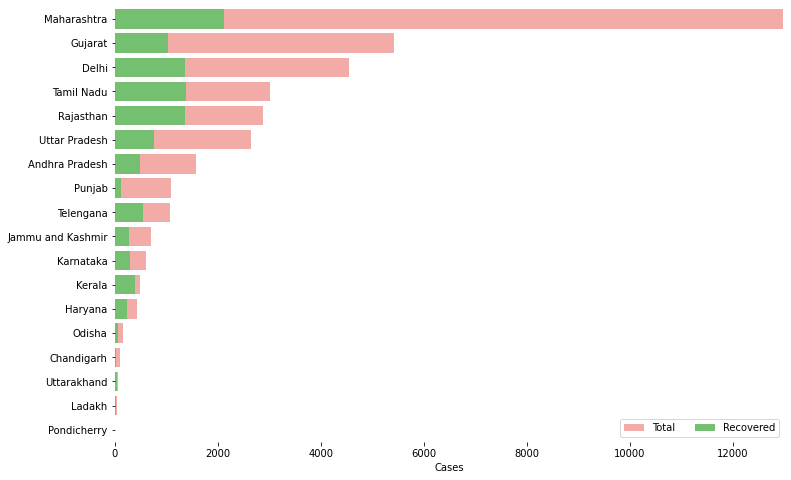

In [24]:
#we are using matplot lib to analyse between active and recovered cases
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total Confirmed cases','Cured/Discharged/Migrated','Deaths']]
data.sort_values('Total Confirmed cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Confirmed cases", y="Name of State / UT", data=data,
            label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured/Discharged/Migrated", y="Name of State / UT", data=data,
            label="Recovered", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 13000), ylabel="",
       xlabel="Cases")
sns.despine(left=True, bottom=True)

**Which state recovery rate is high and why?**


*   The Kerala's recovery rate is much higher other big states. Currently, Kerala's recovery rate stands at  92.07 per cent. Whereas Maharashtra's recovery rate is  49.32 per cent, West Bengal  27.08 per cent, Uttar Pradesh 34.27 per cent, Tamil Nadu 36.59 per cent, Telangana  53.37 per cent, Rajasthan 48.29 per cent, and Gujarat 22.11 per cent.
*   According to The News Minute, Kerala managed to trace contacts of confirmed COVID-19 patients swiftly and limit the spread of the virus in other parts of the state.
*   Another important reason for Kerala's high recoveries was that the many patients had mild symptoms, Ekbal added.

[Source](https://www.businesstoday.in/latest/trends/coronavirus-update-kerala-recovery-rate-at-93-percent-higher-than-maharashtra-gujarat-12-other-states/story/403108.html)


In [0]:
import plotly
plotly.io.renderers.default = 'colab'
#graphs using plotly
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))

fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India


fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

Here from the trends we can observe the graph is exponentially increasing.which is quite common for pandemics.here we can also observe that at the start the pandemic growth was quite low but from april 12 there are sudden rise in the cases.

In [0]:
# Rise in COVID-19 cases in India total cases vs new cases
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    mode='lines+markers',name='Total Cases'))

fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['New Cases'], 
                mode='lines',name='New Cases'))

        
    
fig.update_layout(title_text='Trend of Coronavirus Cases in India(Cumulative cases)',plot_bgcolor='rgb(250, 242, 242)')

fig.show()

In [0]:
# import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


In [0]:
#create subplots using plotly
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan":2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

**Observation**

**How korea graph got stabilised?**

* In an interview with CNN, South Korean Health Minister Park Neunghoo said that he is hoping that his country has passed the peak. Emphasizing the success of early testing, he added that "detecting patients at an early stage is very important and we learned the simple lessons by dealing with this virus that this is very contagious — and once it starts, it spreads very quickly and in very wide areas." Park also said that "raising the testing capability is very important because that way, you can detect someone who's carrying the virus, then you can contain the virus". If the positive trend continues, South Korea's strategy will surely become a model for other impacted countries to follow.

In [0]:

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India"))

fig.add_trace(go.Scatter(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Scatter(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),
              1, 2)

fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),
              2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

**Observation**

From above graphs we can say that the situation is stabilising in south korea and in italy

In [0]:
title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India','Wuhan']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)','rgb(0,0,0)']

mode_size = [10, 10, 12,10]
line_size = [1, 1, 3,2]

fig = go.Figure()

fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))



    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()

# **Forecasting Total Number of Cases**

In [0]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/content/time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("/content/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("/content/time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [33]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [34]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [35]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0,0,0
1,2020-01-22,Australia,New South Wales,0,0,0
2,2020-01-22,Australia,Northern Territory,0,0,0
3,2020-01-22,Australia,Queensland,0,0,0
4,2020-01-22,Australia,South Australia,0,0,0


In [0]:
dfi=df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [37]:
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,5642.811151,6035.283154,555,17,28
2020-01-23,5642.811151,6035.283154,654,18,30
2020-01-24,5642.811151,6035.283154,941,26,35
2020-01-25,5642.811151,6035.283154,1434,42,38
2020-01-26,5642.811151,6035.283154,2118,56,51


In [0]:
from fbprophet import Prophet
confirmed = dfi.groupby('Date').sum()['Confirmed'].reset_index()
deaths = dfi.groupby('Date').sum()['Deaths'].reset_index()
recovered = dfi.groupby('Date').sum()['Recovered'].reset_index()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


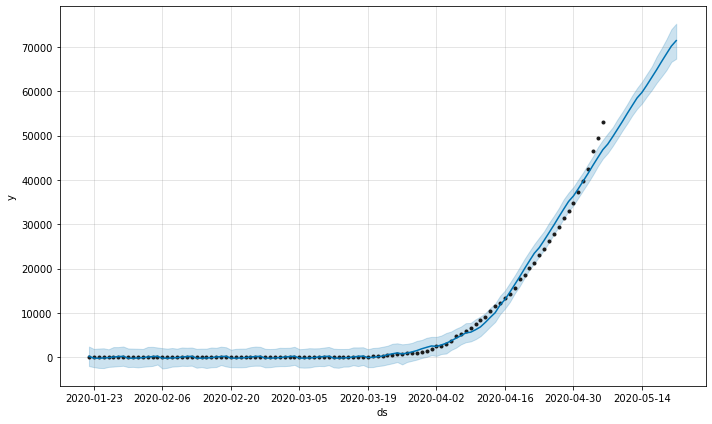

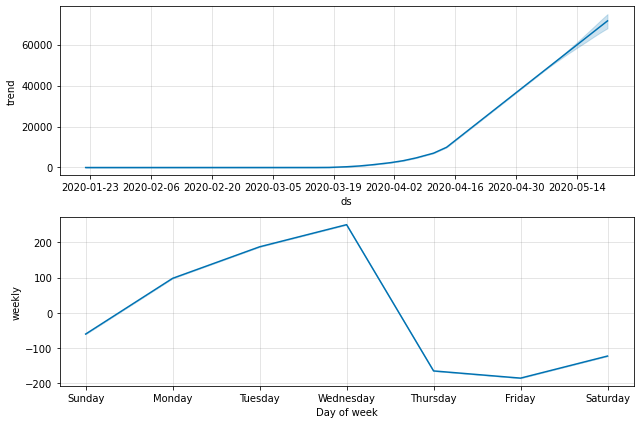

In [54]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=15)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
confirmed_forecast_plot = m.plot(forecast)
confirmed_forecast_plot =m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


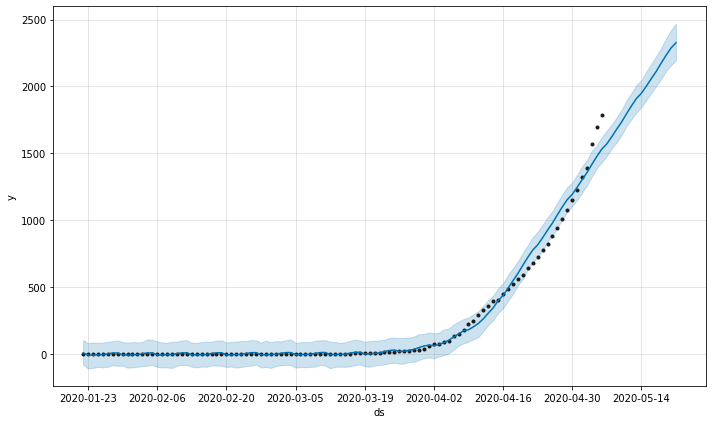

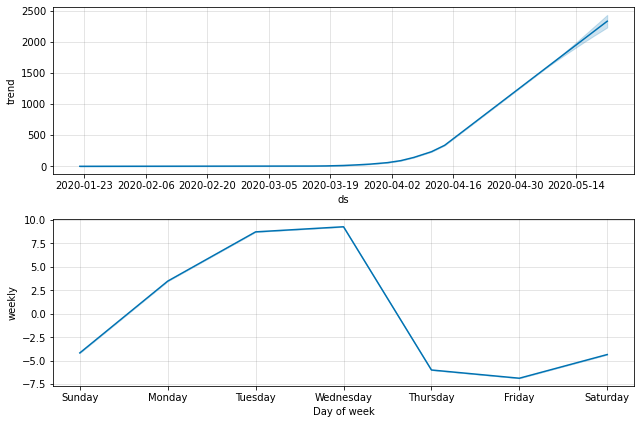

In [51]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=15)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
deaths_forecast_plot = m.plot(forecast)
deaths_forecast_plot =m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


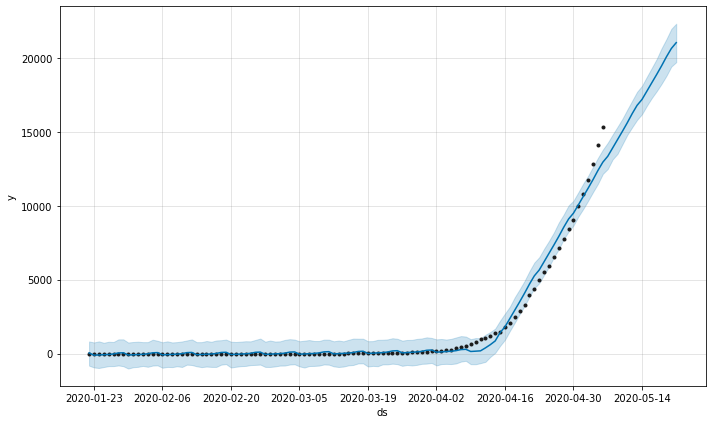

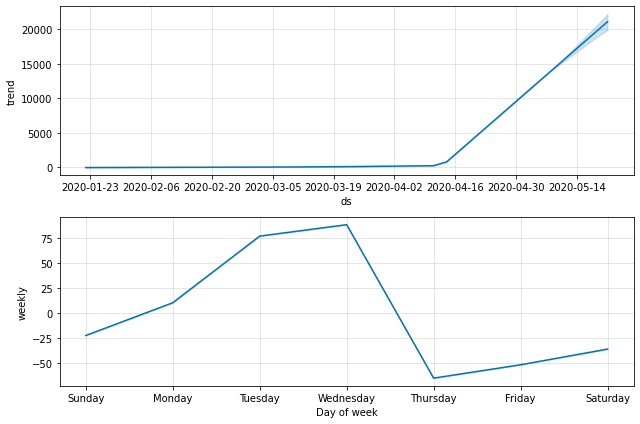

In [53]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=15)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
recovered_forecast_plot = m.plot(forecast)
recovered_forecast_plot =m.plot_components(forecast)

# **Overall Observations:**
* Madhyapradesh has highest number of cases.
* Kerala has highest recovery rate.
* Eastern states are having less number of covid-19 cases.
* India didn't reached its peek yet.India will get hit by corona may be june-july months.
* According to prophet the cases will increase in upcoming days.
* The percentage of people recovering is higher than the people dying.
* The new techniques in discovering covid-19 helped in recognizing cases fastly.
* The cases discovered,recovered and deaths are high on first three days of week and the steep goes down till the end day off the week.
* We have to follow Lockdown rigourously to keep ourselves away from covid-19.